In [1]:
from visualization import single_plane_graph_vis, handle_planes, plot_event
from core.file import NuMLFile
from IPython.display import clear_output

In [2]:
fname = '/data/uboone/pandora/hdf5/numu_slice_x00.txt.h5'

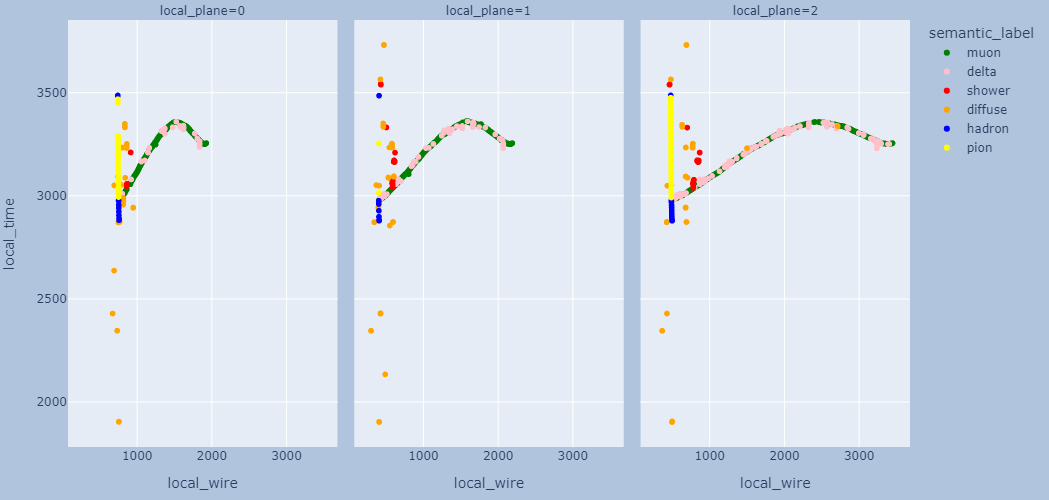

Press Enter to continue or type q to exit q


In [4]:
"""Process all events in a file into graphs"""
f = NuMLFile(fname)
evt = f.get_dataframe("event_table", ["event_id"])
hit = f.get_dataframe("hit_table")
part = f.get_dataframe("particle_table", ["event_id", "g4_id", "parent_id", "type", "momentum", "start_process", "end_process"])
edep = f.get_dataframe("edep_table")
sp = f.get_dataframe("spacepoint_table")

print_out = True
write = False
# loop over events in file
count = 0
for i,key in enumerate(evt.index): 
    planes = single_plane_graph_vis(key, hit, part, edep, sp)
    if planes:
        clear_output(wait=True)
        plot_event(handle_planes(planes), print_out=print_out, write=write)
        if print_out:
            in_key = input("Press Enter to continue or type q to exit")
            if in_key == 'q': break